In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("BackOrders.csv")
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


### Problem

    Is to identify products at risk of backorder before the event occurs so the business has time to react.
    
    
    
### Data description

Data file contains the historical data for the 8 weeks prior to the week we are trying to predict. The data was taken as weekly snapshots at the start of each week. Columns are defined as follows:

    sku - Random ID for the product

    national_inv - Current inventory level for the part

    lead_time - Transit time for product (if available)

    in_transit_qty - Amount of product in transit from source

    forecast_3_month - Forecast sales for the next 3 months

    forecast_6_month - Forecast sales for the next 6 months

    forecast_9_month - Forecast sales for the next 9 months

    sales_1_month - Sales quantity for the prior 1 month time period

    sales_3_month - Sales quantity for the prior 3 month time period

    sales_6_month - Sales quantity for the prior 6 month time period

    sales_9_month - Sales quantity for the prior 9 month time period

    min_bank - Minimum recommend amount to stock

    potential_issue - Source issue for part identified

    pieces_past_due - Parts overdue from source

    perf_6_month_avg - Source performance for prior 6 month period

    perf_12_month_avg - Source performance for prior 12 month period

    local_bo_qty - Amount of stock orders overdue

    deck_risk - Part risk flag

    oe_constraint - Part risk flag

    ppap_risk - Part risk flag

    stop_auto_buy - Part risk flag

    rev_stop - Part risk flag

    went_on_backorder - Product actually went on backorder. This is the target value.
    
         Yes or 1 : Product backordered

         No or 0  : Product not backordered

In [3]:
data.dtypes

sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

### Summary statistics

In [4]:
data.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,6.158900e+04,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,4.196427e+02,43.087256,1.605400,-6.264182,-5.863664,1.205361
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,1.269858e+04,959.614135,42.309229,25.537906,24.844514,29.981155
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.620000,0.640000,0.000000
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,6.000000e+00,0.000000,0.000000,0.820000,0.800000,0.000000
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,5.100000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,3.284895e+06,673445.000000,52.000000,170976.000000,1.126656e+06,2.094336e+06,3.062016e+06,295197.000000,934593.000000,1.799099e+06,2.631590e+06,192978.000000,7392.000000,1.000000,1.000000,2999.000000


### Dropping SKU

In [5]:
data.drop('sku',axis=1,inplace=True)

In [6]:
data.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

### Handling categorical attributes

In [7]:
cat_attr = ['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop','went_on_backorder']
for col in cat_attr:
    data[col] = data[col].astype('category')

In [8]:
data.dtypes

national_inv            int64
lead_time             float64
in_transit_qty          int64
forecast_3_month        int64
forecast_6_month        int64
forecast_9_month        int64
sales_1_month           int64
sales_3_month           int64
sales_6_month           int64
sales_9_month           int64
min_bank                int64
potential_issue      category
pieces_past_due         int64
perf_6_month_avg      float64
perf_12_month_avg     float64
local_bo_qty            int64
deck_risk            category
oe_constraint        category
ppap_risk            category
stop_auto_buy        category
rev_stop             category
went_on_backorder    category
dtype: object

### Handling missing values

In [9]:
data.isnull().sum()

national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

### Creating a list of medians _(one for each column)_ and passing in to fillna() function.
**This will impute NA is each column with its respective median value**

In [10]:
median_list = data.median()
data.fillna(median_list,inplace=True)

In [11]:
data.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [12]:
data = pd.get_dummies(columns=cat_attr, data = data, prefix=cat_attr, prefix_sep="_", drop_first=True)
data.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
0,117,8.0,0,0,0,0,0,0,15,15,...,-99.00,-99.00,0,0,0,0,1,1,0,0
1,7,2.0,0,0,0,0,0,0,0,0,...,0.50,0.28,0,0,1,0,0,1,0,0
2,258,15.0,10,10,77,184,46,132,256,365,...,0.54,0.70,0,0,0,0,0,1,0,0
3,46,2.0,0,0,0,0,1,2,6,9,...,0.75,0.90,0,0,1,0,0,1,0,0
4,2,2.0,0,4,6,10,2,2,5,6,...,0.97,0.92,0,0,0,0,0,1,0,0


### Checking target distribution

In [13]:
data.went_on_backorder_Yes.value_counts()

0    50296
1    11293
Name: went_on_backorder_Yes, dtype: int64

### Decoupling target from data

In [14]:
X = data.loc[:,data.columns.difference(['went_on_backorder_Yes'])]
y = data.went_on_backorder_Yes

In [15]:
print(X.shape)
print(y.shape)

(61589, 21)
(61589,)


### Train-Test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=124)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43112, 21)
(18477, 21)
(43112,)
(18477,)


### Logistic model 1

In [17]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Generating predictions

In [18]:
train_preds = logistic_model.predict(X_train)
test_preds = logistic_model.predict(X_test)

In [19]:
train_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,train_preds)

array([[35039,   151],
       [ 7241,   681]])

### Classification matrix

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_train,train_preds))

             precision    recall  f1-score   support

          0       0.83      1.00      0.90     35190
          1       0.82      0.09      0.16      7922

avg / total       0.83      0.83      0.77     43112



In [22]:
print(classification_report(y_test,test_preds))

             precision    recall  f1-score   support

          0       0.83      1.00      0.90     15106
          1       0.79      0.08      0.15      3371

avg / total       0.82      0.83      0.77     18477



### Logistic model 2 -  _(with balanced weights to handle class imbalance)_

In [23]:
balanced_model = LogisticRegression(class_weight="balanced")

balanced_model.fit(X_train,y_train)

balanced_train_pred = balanced_model.predict(X_train)
balanced_test_pred = balanced_model.predict(X_test)

### Confusion matrix from model 1

In [24]:
confusion_matrix(y_train,train_preds)

array([[35039,   151],
       [ 7241,   681]])

### Confusion matrix from model 2

In [25]:
confusion_matrix(y_train,balanced_train_pred)

array([[31369,  3821],
       [ 3160,  4762]])

### Predicting probabilities using model 2

In [26]:
train_pred_prob = balanced_model.predict_proba(X_train)[:,1]

### ROC curve and AUC

In [27]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_train, train_pred_prob)
roc_auc = auc(fpr, tpr)

<IPython.core.display.Javascript object>


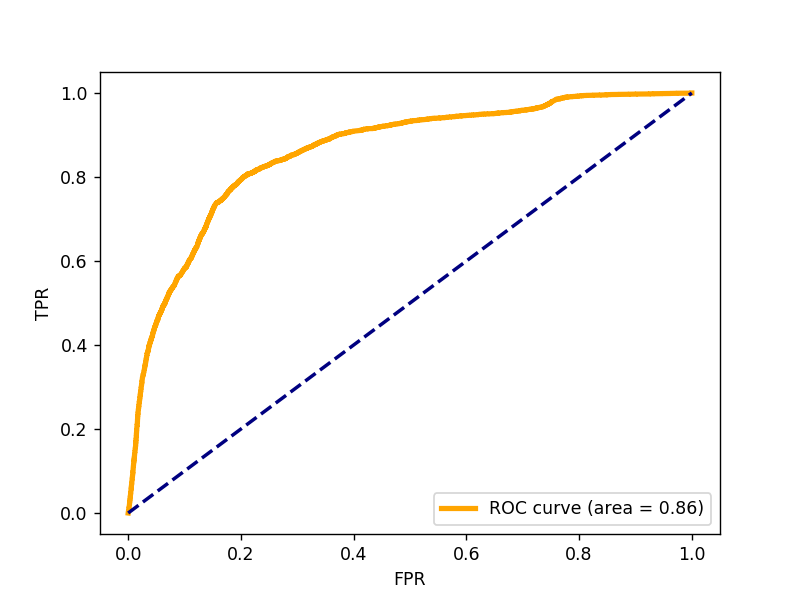

In [33]:
import matplotlib.pyplot as plt
%matplotlib notebook
# plt.figure()
plt.plot(fpr,tpr,color='orange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")

### Manual inspection of ROC dataframe

In [29]:
roc_df = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':threshold})
roc_df.iloc[6500:6510,:]

,FPR,TPR,Threshold
6500,0.234356,0.821257,0.492411
6501,0.234442,0.821257,0.492408
6502,0.234555,0.821257,0.492405
6503,0.234555,0.821383,0.492405
6504,0.234811,0.821383,0.492398
6505,0.234811,0.821510,0.492398
6506,0.235038,0.821510,0.492390
6507,0.235038,0.821636,0.492388
6508,0.235124,0.821636,0.492387
6509,0.235180,0.821636,0.492385


### Making predictions using custom threshold

In [30]:
custom_threshold = 0.2

In [31]:
## To get in 0-1 format vector (pandas Series)
final_pred_array = pd.Series([0 if x>custom_threshold else 1 for x in train_pred_prob])
final_pred_array.value_counts()

0    39132
1     3980
dtype: int64

In [32]:
## To get True-False format vector (pandas Series)
final_pred = pd.Series(train_pred_prob > 0.2)
final_pred.value_counts()

True     39132
False     3980
dtype: int64